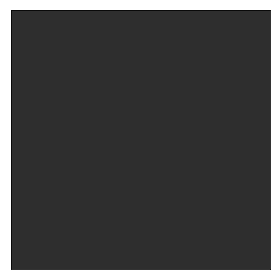

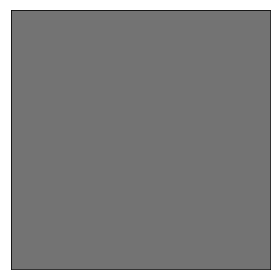

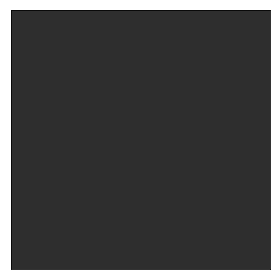

[ 0.18  0.18  0.18]
[ 0.45292207  0.45292207  0.45292207]
[0.17999999999999999, 0.17999999999999999, 0.17999999999999999]


In [2]:
import colour, numpy as np
from colour.utilities import tsplit, tstack
from colour.constants import DEFAULT_INT_DTYPE
from colour.algebra import spow

RGB = np.array([0.18, 0.18, 0.18])
colour.plotting.plot_multi_colour_swatches(RGB)

LUT = colour.LUT3x1D(colour.LUT3x1D.linear_table() ** (1 / 2.2))
RGB_a = LUT.apply(RGB)
colour.plotting.plot_multi_colour_swatches(RGB_a)

LUT_i = colour.LUT3x1D()

R, G, B = tsplit(RGB_a)

domain_min, domain_max = LUT_i.domain
size = DEFAULT_INT_DTYPE(LUT_i.size / 3)
samples = [np.linspace(domain_min[i], domain_max[i],LUT_i.size)
                for i in range(3)
            ]

R_t, G_t, B_t = tsplit(LUT.table)

s_R, s_G, s_B = samples

RGB_i = [
            colour.LinearInterpolator(a[0], a[1])(a[2])
            for a in zip((R_t, G_t, B_t), (s_R, s_G, s_B), (R, G, B))
        ]
        
colour.plotting.plot_multi_colour_swatches(tstack(RGB_i))

print(RGB)
print(RGB_a)
print(RGB_i)